# Text Analysis on Great Expectations Novel

### Imports- **Run First**

In [1]:
# Bring in text file with our novel
textfile = open('great_expectations.txt', 'r', encoding="utf8")
great_expect = textfile.read()




In [2]:
# Import libraries
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

import pandas as pd
from PIL import Image
import numpy as np
import random
import re
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Lowercase words for word cloud
word_cloud_text = great_expect.lower()
# Remove numbers and alphanumeric words we don't need for word cloud
word_cloud_text = re.sub("[^a-zA-Z0-9]", " ", word_cloud_text)


In [4]:
# Tokenize the data to split it into words
tokens = word_tokenize(word_cloud_text)
# Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
# Remove short words less than 3 letters in length
tokens = (word for word in tokens if len(word) >= 3)
# Add word cloud stopwords
stopwords_wc = set(stopwords.words("english"))


In [5]:
# Define gray_color_func function and mask variable for advanced word cloud
mask = np.array(Image.open("man_in_top_hat.jpeg"))


def gray_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


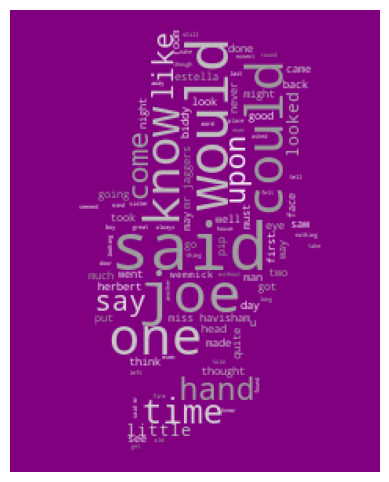

In [6]:
# Create advanced Word Cloud with our text data
wordcloud = WordCloud(background_color="purple", max_words=100, mask=mask,
                      color_func=gray_color_func, stopwords=stopwords_wc, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### How to analyze word frequency

In [7]:
#Create word frequency distribution
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'said': 1349, 'joe': 747, 'would': 599, 'one': 514, 'could': 484, 'know': 392, 'miss': 383, 'come': 375, 'time': 374, 'little': 371, ...})

In [8]:
#View the 50 most common words in the text
fdist.most_common(50)

[('said', 1349),
 ('joe', 747),
 ('would', 599),
 ('one', 514),
 ('could', 484),
 ('know', 392),
 ('miss', 383),
 ('come', 375),
 ('time', 374),
 ('little', 371),
 ('upon', 368),
 ('pip', 341),
 ('like', 327),
 ('looked', 325),
 ('man', 321),
 ('havisham', 318),
 ('never', 315),
 ('old', 314),
 ('herbert', 313),
 ('much', 312),
 ('well', 304),
 ('say', 301),
 ('made', 300),
 ('went', 290),
 ('wemmick', 284),
 ('way', 278),
 ('see', 277),
 ('hand', 270),
 ('estella', 270),
 ('good', 257),
 ('two', 255),
 ('saw', 250),
 ('put', 246),
 ('back', 244),
 ('took', 243),
 ('jaggers', 242),
 ('think', 241),
 ('going', 241),
 ('got', 238),
 ('thought', 238),
 ('came', 235),
 ('head', 232),
 ('biddy', 231),
 ('might', 228),
 ('boy', 220),
 ('day', 219),
 ('night', 213),
 ('done', 212),
 ('dear', 209),
 ('must', 208)]

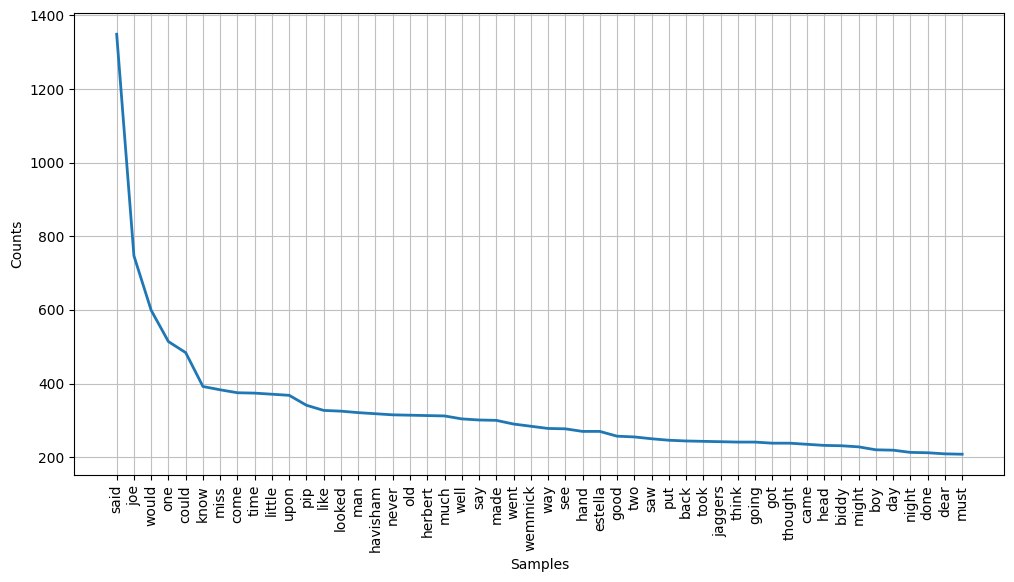

In [9]:
#Visualization of top 50 most common words in text
plt.figure(figsize=(12, 6))
fdist.plot(50)
plt.show()

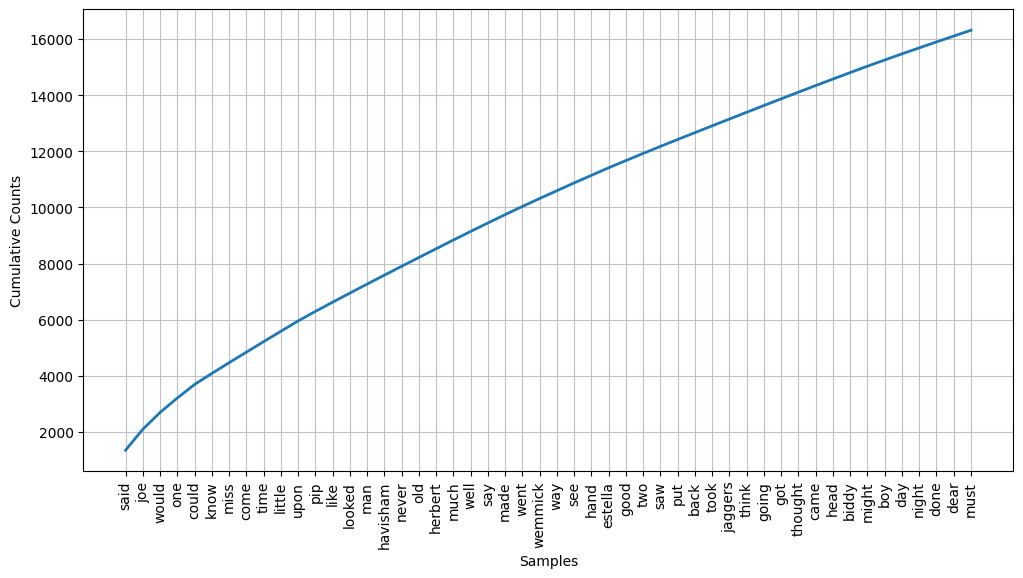

In [10]:
# Visualization of top 50 most common words in text cumulatively
plt.figure(figsize=(12, 6))
fdist.plot(50, cumulative=True)
plt.show()